# Sales Analysis Report - Australian Apparel Limited (AAL)
**Quarter:** Q4 2020  
**Prepared by:** SWAROOP SHUBHAM NAYAK   
**Date:**   01 AUGUST 2025

---

## **Project Objective**
Analyze sales performance by:
- State
- Customer group
- Time period (weekly, monthly, daily)
- Time of day

**Goals:**
- Identify top-performing and underperforming regions.
- Recommend strategies to improve sales in weaker markets.
- Understand seasonal and daily purchase trends.

---


In [6]:
pip install -U scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.0 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 4.7 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 4.6 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 4.9 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.7 MB/s  0:00:01
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   - -------------------------------------- 1.6/39.4 MB 7.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/39.4 MB 9.5 MB/s eta 0:00:04
   ----- ---------------------------------- 5.8/39.4 MB 9.5 MB/s eta 0:00:04
   -------- ------------------------------- 8.1/39.4 MB 9.6 MB/s eta 0:00:04
   ---------- ----------

In [7]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(style="whitegrid") # makes the bakground white of graphs and chatrs

from sklearn.preprocessing import MinMaxScaler


In [9]:
df = pd.read_csv("AAL Data.csv") # Loading the data set
df.head() # this show the 1st five column names

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [10]:
df.shape # no. of rows and columns

(7560, 6)

In [11]:
df.info() # Gives detailed information about the data set
df.describe() # Gives the Descriptive Statistics for the data set[Q1,Q2,Q3,Mean,Median,Mode]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


## Descriptive Statistics Report

The table below summarizes the distribution of **Units** and **Sales** in the dataset.

| Statistic | Unit        | Sales        | Explanation |
|-----------|-------------|--------------|-------------|
| **Count** | 7560.000000 | 7560.000000  | Total number of observations (rows of data). |
| **Mean**  | 18.005423   | 45013.558201 | The average value across all observations. |
| **Std**   | 12.901403   | 32253.506944 | Standard deviation: measures how spread out the data is around the mean. |
| **Min**   | 2.000000    | 5000.000000  | The smallest observed value in the dataset. |
| **25%**   | 8.000000    | 20000.000000 | First quartile (Q1): 25% of the data points lie below this value. |
| **50%**   | 14.000000   | 35000.000000 | Median (Q2): middle value of the dataset. |
| **75%**   | 26.000000   | 65000.000000 | Third quartile (Q3): 75% of the data points lie below this value. |
| **Max**   | 65.000000   | 162500.000000| The largest observed value in the dataset. |

---

### Key Notes:
- **Quartiles (25%, 50%, 75%)** split the dataset into four equal parts.  
  - Q1 (25%) is the value below which 25% of data falls.  
  - Q2 (50%) is the median (half the data is below, half above).  
  - Q3 (75%) is the value below which 75% of data falls.  
- **Standard deviation** tells us how “spread out” the values are. A higher standard deviation means more variation.  
- **Min and Max** give the range of observed values.  
- Together, these statistics give a quick snapshot of the dataset’s shape, spread, and central tendency.


<Axes: >

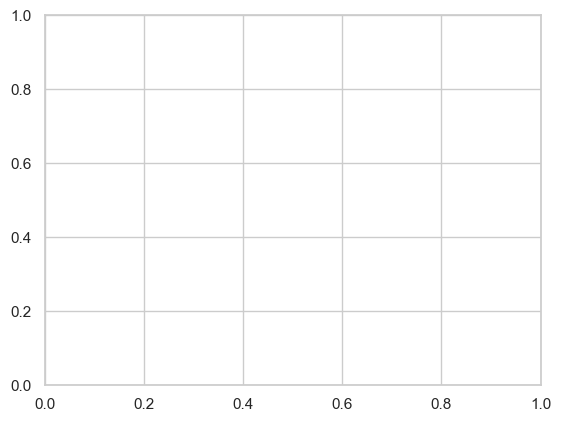

In [12]:
sns.boxenplot()

## Data Cleaning

In [13]:
print(df.isna().sum())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [14]:
df.duplicated().sum()

np.int64(0)

***Null Vales = 0***

***Duplicates = 0***

***Therefore no need to handle them the data is preety goodd.***

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y') # Conerting the Object data type into Date
df['Time'] = df['Time'].str.strip().str.title()
scaler = MinMaxScaler()
df[['Sales', 'Unit']] = scaler.fit_transform(df[['Sales', 'Unit']]) # Normalization:- making values into same unit[0-1]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   float64       
 5   Sales   7560 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 354.5+ KB


In [17]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()
group_sales = df.groupby('Group')['Sales'].sum().reset_index()
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

In [18]:
df['Week'] = df['Date'].dt.isocalendar().week
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Quarter'] = df['Date'].dt.quarter

weekly_sales = df.groupby('Week')['Sales'].sum().reset_index()
monthly_sales = df.groupby('Month_Name')['Sales'].sum().reset_index()
quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()


## 1. State-wise Sales

This chart shows the **total sales for each state** in Q4 2020.  
It will help us identify:
- Which states generate the **most revenue**.
- Which states **need improvement**.

The CEO can use this insight to decide **where to invest** and **where to run promotions**.


In [19]:
import warnings
warnings.filterwarnings("ignore")
# Igonre the warnigs

In [20]:
# Aggregate total sales per state
state_sales_total = df.groupby('State')['Sales'].sum().reset_index()

# Interactive bar plot
fig = px.bar(
    state_sales_total,
    x='State',
    y='Sales',
    color='State',                  
    title='Interactive State-wise Total Sales (Q4 2020)',
    labels={'Sales':'Total Sales', 'State':'State'},
    text='Sales',                   
    color_discrete_sequence=px.colors.qualitative.Vivid
)

# Show values on top of bars and ensure full visibility
fig.update_traces(
    texttemplate='%{text:.1f}',   # show one decimal point
    textposition='outside'
)

# Adjust layout so bars and text are fully visible
fig.update_layout(
    yaxis=dict(range=[0, state_sales_total['Sales'].max() * 1.15]),  # add 15% space on top
    margin=dict(t=80, b=50, l=50, r=50),  # increase top margin
    title_font_size=16
)

# Show interactive plot
fig.show()


**Insight:**  
- **Victoria (VIC)** is the top-performing state in Q4 2020.  
- **Western Australia (WA)** is the weakest state, with the lowest sales figures.  

**Business Implication:**  
- Invest more in VIC — open more stores, increase marketing budgets.  
- WA needs **targeted promotional campaigns** or a **review of product demand**.


*________________________________________________________________________________________________________________________________________________________________*

## 2. Group-wise Sales

This chart shows the **total sales for each customer group** in Q4 2020.  
The four groups are:
- **Men**
- **Women**
- **Kids**
- **Seniors**

This analysis helps us understand:
- Which customer segment contributes the **most revenue**.
- Which segment has **growth potential** and needs marketing attention.


In [21]:
import plotly.express as px

# Sort groups from highest to lowest sales (optional for pie chart)
group_sales_sorted = group_sales.sort_values(by='Sales', ascending=False)

# Create interactive pie chart
fig = px.pie(
    group_sales_sorted,
    names='Group',
    values='Sales',
    title='Group-wise Total Sales (Q4 2020)',
    color='Group',                   # optional: color by group
    hole=0.0                         # 0 for full pie, >0 for donut chart
)

# Show values and percentages on the pie chart
fig.update_traces(
    textinfo='percent+label',        
    textfont_size=14,
    hovertemplate='%{label}: %{value:.1f} Sales (%{percent})<extra></extra>'
)

# Adjust layout
fig.update_layout(
    title_font_size=16,
    title_font_family='Arial',
    margin=dict(t=80, b=50, l=50, r=50)
)

# Show interactive plot
fig.show()


**Insight:**  
- **Men** is the top-performing category, slightly ahead of Women and Kids.  
- **Seniors** have the lowest sales among all customer groups.  

**Business Implication:**  
- Men’s fashion is already strong — maintain variety and quality to keep customers engaged.  
- Seniors could be targeted with **special offers, loyalty programs, or senior discount days** to boost their sales.


_______________________________________________________________________________________________________________________________________________________________

## 3. State + Group Sales

This chart shows **sales for each customer group within each state** in Q4 2020.  
It helps us understand:
- Which customer groups are **strongest in each state**.
- Where there is **opportunity for targeted marketing**.

For example:
- If VIC performs strongly across **all groups**, it shows a balanced demand.
- If WA performs poorly across all groups, it indicates a general market issue in that state.


In [22]:
# Ensure states are sorted by total sales
state_order = state_sales.sort_values(by='Sales', ascending=False)['State']

# Convert 'State' to categorical with specific order
state_group_sales['State'] = pd.Categorical(state_group_sales['State'], categories=state_order, ordered=True)

# Create interactive grouped bar chart
fig = px.bar(
    state_group_sales,
    x='State',
    y='Sales',
    color='Group',                   # group by customer group
    barmode='group',                 # ensures bars are side by side (clustered)
    text='Sales',                     # show values on bars
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='State + Group Sales (Q4 2020)',
    labels={'Sales':'Total Sales', 'State':'State', 'Group':'Customer Group'}
)

# Show sales values on top of bars
fig.update_traces(
    texttemplate='%{text:.1f}',
    textposition='outside'
)

# Adjust layout for better visibility
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Total Sales',
    title_font_size=16,
    title_font_family='Arial',
    legend_title_text='Customer Group',
    #margin=dict(t=80, b=100, l=70, r=50)  # increased bottom margin for long state names
)

# Show interactive plot
fig.show()


**Insight:**  
- **VIC** leads in **all four groups** — a strong, balanced market.  
- **NSW** is the second-best but slightly weaker in Seniors.  
- **WA** is the weakest state in all categories.  

**Business Implication:**  
- VIC should be the **top priority** for expansion and investment.  
- WA requires **urgent attention** — investigate store locations, marketing effectiveness, and product selection.  
- Targeted campaigns for **Seniors in NSW** could help improve performance in that segment.


_________________________________________________________________________________________________________________________________________________________________

## 4. Monthly Sales Trend

This chart shows the **total sales for each month** in Q4 2020:  
- **October**
- **November**
- **December**

It helps us identify:
- How sales change from month to month.
- Seasonal peaks or dips in customer demand.

This is important for:
- Planning marketing campaigns.
- Stocking inventory ahead of busy months.
- Understanding slow months that may need promotions.


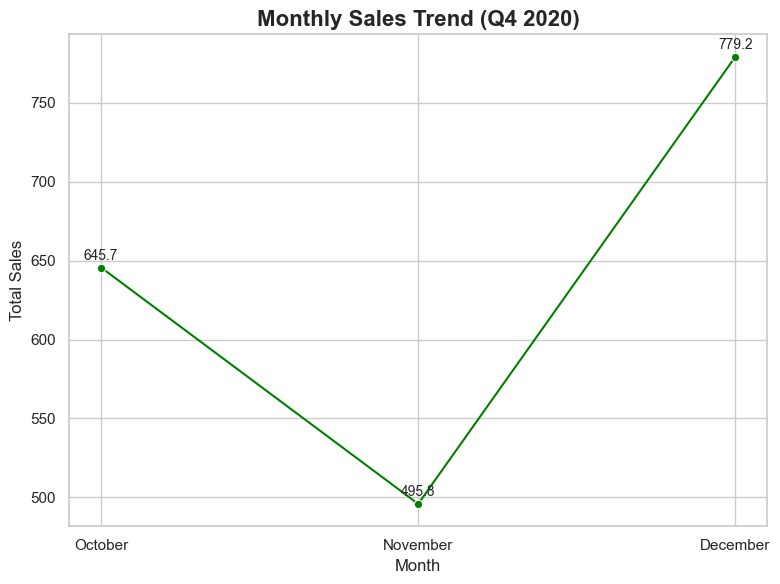

In [23]:
# Ensure months are in correct order
month_order = ['October', 'November', 'December']
monthly_sales['Month_Name'] = pd.Categorical(monthly_sales['Month_Name'], categories=month_order, ordered=True)
monthly_sales_sorted = monthly_sales.sort_values('Month_Name')

# Create the line plot
plt.figure(figsize=(8,6))
sns.lineplot(
    data=monthly_sales_sorted,
    x='Month_Name', 
    y='Sales', 
    marker='o', 
    color='green'
)

# Add title and labels
plt.title('Monthly Sales Trend (Q4 2020)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Show values on points
for x, y in zip(monthly_sales_sorted['Month_Name'], monthly_sales_sorted['Sales']):
    plt.text(x, y + 5, f"{y:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


**Insight:**  
- **December** has the highest sales — likely due to Christmas and holiday shopping.  
- **November** shows a clear dip compared to October and December.  
- **October** starts strong but is still below December’s peak.

**Business Implication:**  
- Increase marketing and stock levels in **December** to maximize profits.  
- Run **mid-season promotions in November** to counteract the sales slowdown.  
- October could be used for **early-bird holiday campaigns** to get ahead of competitors.


_______________________________________________________________________________________________________________________________________________________________

## 5. Weekly Sales Trend

This chart shows **total sales per week** in Q4 2020.

It helps us identify:
- Which specific weeks drive the highest revenue.
- Seasonal shopping peaks (e.g., holiday weeks).
- Slow weeks that may need targeted marketing.

Weekly analysis is more detailed than monthly analysis and is useful for:
- Planning **short-term promotions**.
- Managing **weekly inventory and staffing**.


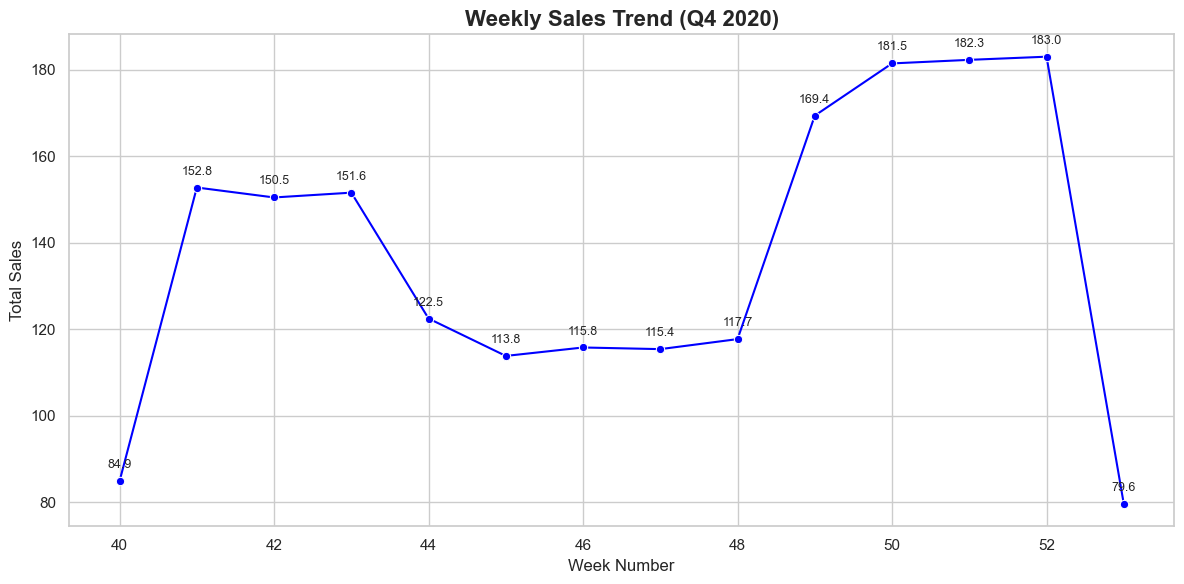

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=weekly_sales,
    x='Week', 
    y='Sales', 
    marker='o', 
    color='blue'
)

# Add title and labels
plt.title('Weekly Sales Trend (Q4 2020)', fontsize=16, fontweight='bold')
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Show values on points
for x, y in zip(weekly_sales['Week'], weekly_sales['Sales']):
    plt.text(x, y + 3, f"{y:.1f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


**Insight:**  
- Sales rise steadily from early October and peak in **Weeks 51–52** (just before Christmas/New Year).  
- **Week 49–50** also shows strong performance as the holiday season begins.  
- **Week 53** has a sharp drop in sales after the holiday period.  
- Early weeks (Week 40–44) are moderate but not as strong as the holiday period.

**Business Implication:**  
- Concentrate **major promotions** during Weeks 49–52 to maximize holiday sales.  
- Avoid heavy spending in Week 53 — instead, use clearance sales for leftover inventory.  
- Use October weeks to **build awareness** for upcoming holiday offers.


_________________________________________________________________________________________________________________________________________________________________

## 6. Time-of-Day Sales

This chart shows the **total sales by time of day** in Q4 2020.

The four categories are:
- **Morning**
- **Afternoon**
- **Evening**
- **Night**

This analysis helps identify:
- Peak shopping hours for physical store sales.
- Time slots to focus promotions and advertising.
- Potential low-activity hours that could be improved with targeted offers.


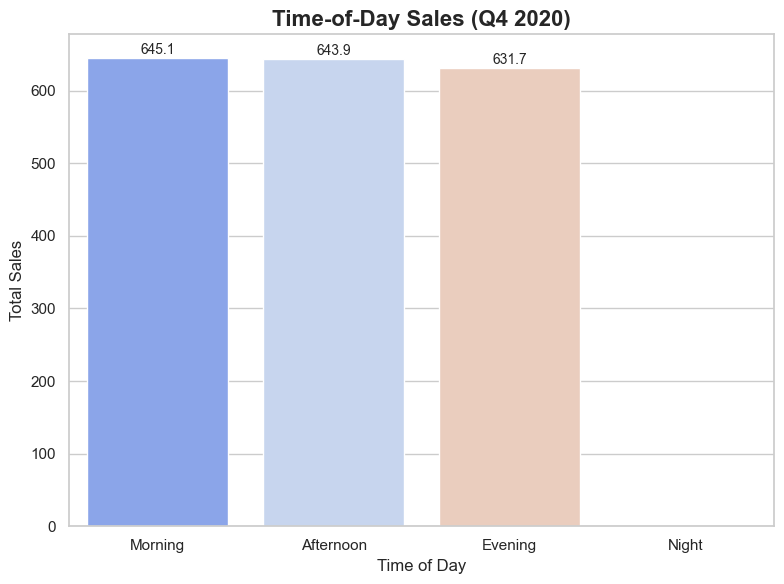

In [25]:
# Clean and order the Time column
df['Time'] = df['Time'].str.strip().str.title()
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Group sales by time of day
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

# Ensure correct order
time_sales['Time'] = pd.Categorical(time_sales['Time'], categories=time_order, ordered=True)
time_sales = time_sales.sort_values('Time')

# Create the bar plot
plt.figure(figsize=(8,6))
sns.barplot(
    data=time_sales,
    x='Time', 
    y='Sales',
    palette='coolwarm'
)

# Add title and labels
plt.title('Time-of-Day Sales (Q4 2020)', fontsize=16, fontweight='bold')
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Show values on top of bars
for index, value in enumerate(time_sales['Sales']):
    plt.text(index, value + 5, f"{value:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**  
- **Morning** and **Afternoon** are the strongest sales periods.  
- **Evening** has moderate sales activity.  
- **Night** sales are **zero** — likely because this dataset reflects physical store sales, and stores are closed at night.

**Business Implication:**  
- Schedule **more staff** and **higher stock levels** for mornings and afternoons.  
- Plan promotions during the **peak hours** to maximize reach.  
- Unless online sales are introduced, night promotions are unnecessary for in-store operations.


________________________________________________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________________________________________________

# 🎯 **Conclusion & Recommendations**

---

## 📝 **Summary of Key Findings**
- 🥇 **Top State:** **Victoria (VIC)** — highest-performing across all customer groups.
- 📉 **Lowest State:** **Western Australia (WA)** — consistently low sales in every category.
- 👔 **Top Group:** **Men** — slightly ahead of Women and Kids.
- 👴 **Lowest Group:** **Seniors** — lowest-performing segment.
- 📅 **Seasonality:** **December** has the highest sales due to the holiday season; **November** shows a noticeable dip.
- 📆 **Weekly Trends:** Peak sales in **Weeks 49–52** (pre-Christmas/New Year rush).
- ⏰ **Time of Day:** **Morning** & **Afternoon** are busiest; **Night** sales are zero (likely due to store closing hours).

---

## 💡 **Business Recommendations**

### 1️⃣ **Maximize VIC Potential**
- 🏬 Expand store presence in **Victoria**.
- 🚀 Continue **aggressive marketing** in this state.
- 📦 Stock **high-demand products** across all groups.

### 2️⃣ **Revive WA Sales**
- 🔍 Investigate reasons for **low performance** (location, marketing, product fit).
- 📢 Launch **region-specific marketing campaigns**.
- 💸 Offer **location-based discounts** to increase foot traffic.

### 3️⃣ **Boost Seniors’ Sales**
- 🎁 Introduce **senior citizen discounts** & **loyalty programs**.
- 👕 Promote **comfort-focused, affordable clothing**.
- 📺 Target seniors via **local newspapers, radio, and community events**.

### 4️⃣ **Leverage Seasonal Peaks**
- 🎄 Increase marketing budget during **December**.
- 📦 Ensure **high stock availability** before holidays.
- 🛍 Launch **early-bird Christmas promotions** in **October**.

### 5️⃣ **Address November Dip**
- 📊 Run **mid-season sales events** in November.
- 🎟 Offer **bundle deals & limited-time offers** to maintain momentum.

### 6️⃣ **Optimize Time-of-Day Promotions**
- ⚡ Schedule **flash sales** in **Morning** & **Afternoon** (peak hours).
- ❌ Avoid wasting ad spend on **night campaigns** unless online sales are introduced.

---

✅ **Final Note:**  
This analysis shows that **VIC is the revenue driver**, **WA needs urgent action**, and **holiday seasons dominate sales**.  
Strategically focusing resources on **high-potential states, time slots, and customer groups** will **maximize AAL’s Q1 2021 growth**.
